### LINEAR REGRESSION

A model that assumes a linear relationship between the input variables (x) and the single output variable (y).

### Linear regression and multiple regression

When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple regression.

## The main idea

* Fit a line to the data using least squares.
* Calculate R^2


<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4735094%2Fac2b17d6a2c8351851527d41fe34ed5a%2F1548702778023.png?generation=1600526502256987&alt=media" alt="linear-regression" width="600px">

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares. It is common to therefore refer to a model prepared this way as Ordinary Least Squares Linear Regression or just Least Squares Regression.

### Few models for linear regression

* Simple linear regression
* Ordinary least square method
* Gradient descent
* Regularization

## Ordinary Least square method

### Mathematics behind it

We take our model's linear equation as  
`y = A + Bx + e` <br>
Where e is error of approximation. <br>

We can rewrite our line as 
`y' = A + Bx'` <br>
Where `e = y - y'`

Now for all the points on the graph, there will be some value of e. <br>
Thus we can say that `e(i) = y(i) - h(x(i))`. <br> 
Where
* i - ith observation
* y - actual label
* h(x) - predicted label

The best possible approximation will be given by sum of squared errors, thus called `Least square approximation`.

`S = e(1)^2 + e(2)^2 + .... + e(n)^2` <br>
`S = Σ[y(i)-h(x(i))]^2` <br>
`S = Σ[y(i) - (A+Bx(i))]^2` <br>

We choose values of A and B such that S is minimum. Thus upon minimizing sum of squared errors, we get 

`Σy(i) = na + bΣx(i)` <br>
`Σx(i)y(i) = aΣx(i) + bΣx(i)^2`

Here, n is number of rows/ samples.

Thus these equations can be used to find our linear regression equation.

In [8]:
# Lets see an example of OLS.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define X and y variables.
y = np.array([20, 18, 15, 12, 9, 5, 2]) # Dependent variable x(i)
X = np.array([100, 150, 200, 300, 400, 500, 600]) # Independent variable y(i)
y, X

(array([20, 18, 15, 12,  9,  5,  2]),
 array([100, 150, 200, 300, 400, 500, 600]))

In [10]:
X_2 = np.square(X) # x^2(i) values
Xy = X*y # x(i)*y(i) values
X_2, Xy


(array([ 10000,  22500,  40000,  90000, 160000, 250000, 360000]),
 array([2000, 2700, 3000, 3600, 3600, 2500, 1200]))

In [11]:
# Confirm that size of array x and y matches
len(X) == len(y)

True

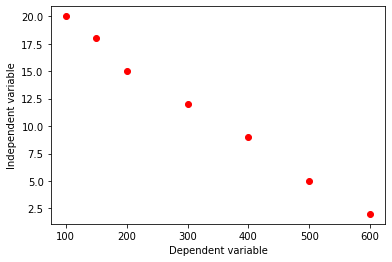

In [15]:
# Visualising our data

plt.plot(X, y, 'ro')
plt.xlabel("Dependent variable")
plt.ylabel("Independent variable")
plt.show()

In [19]:
# Calculating sum of x, y, x^2, xy

def calculateSum(v):
  sum = 0
  for i in v:
    sum = sum+i

  return sum

X_sum = calculateSum(X)
X_2_sum = calculateSum(X_2)
y_sum = calculateSum(y)
Xy_sum = calculateSum(Xy)
X_sum, X_2_sum, y_sum, Xy_sum

(2250, 932500, 81, 18600)

In [17]:
# Define number of rows 

n = len(X)
n

7

In [21]:
# Using equations derived above to calculate coefficients A and B.
# Solving those equations for A and B, we get following equations

d = n*X_2_sum-np.square(X_sum)

A = (y_sum*X_2_sum -X_sum*Xy_sum)/d
B = (n*Xy_sum - X_sum*y_sum)/d

A, B

(22.99146757679181, -0.03552901023890785)

In [24]:
# Thus final regression line is 
print(f"y=({A})+({B})x")

y=(22.99146757679181)+(-0.03552901023890785)x


### Making predictions with linear regression

Suppose our linear regression equation is y = A + Bx

* We call y as dependent variable.  
* We call x as independent variable.

* We say that parameter B represnts the variation of the dependent variable when independent variable has a unitary variation.

 For example, if we have B = 0.5, then upon increasing x by 1, y will  increase by 0.5.

* Parameter A gives us value of dependent variable (y) when independent variable (x) is 0.

Now, assuming that we have a data of corresponding height and weight of people of a college, upon trainig the linear regression model, we get values of coefficients A and B. Using these values, we can then make prediction on incoming data.

For example, assuming we got A = 5000 and B = 200 on training our model, considering height as x and weight as y, we have a new student's height to be 172cm. Thus the student's predicted weight will be - 

y = 50000 + 200x <br>
y = 50000 + 2*172 <br>
y = 50000 + 34400 <br>
y = 84400 g <br>
y = 84.4 Kg <br>

Thus the new student's predicted weight will be <b>84.4 Kg</b>

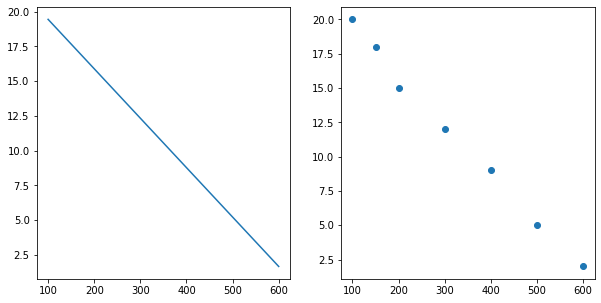

In [33]:
# Final result

y_predicted = A+B*X
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.plot(X, y_predicted)
ax2.scatter(X, y)

## Calculation of R2 (Testing model efficiency)

R2 also known as coefficient of determination. It is used to how well the model's equation explains the change in dependent variable.

If R2 is near 1, the model is strong, i.e. the independent variable totally explains the variation in dependent variable.

Formula of R2 

<img src="https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/images/graphics/r_squared_constant.gif" alt="formula for r2">

* y(cap) - Predicted value
* y - Actual value
* y(bar) - Mean value (dependent variable)

`SST = SSR + SSE`

Explanation curve

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20200421144010724-0711:9781108614528:49898fig6_2.png?pub-status=live" alt="example-r2" width="500px">

In [36]:
# Check if above defined model is strong model i.e. if x explains variation in y.

SSR = calculateSum(np.square(y_predicted-np.mean(y)))
SST = calculateSum(np.square(y-np.mean(y)))
SSR, SST

(264.18356899073626, 265.71428571428567)

In [37]:
# Calculating R2 value

r2 = SSR/SST
r2

0.9942392381371796

We can see that value of `R2 ~ 1`. Thus we can say that values of x or independent variable completely explained variation in values of y or dependent variable.

## P - value and R2 (Additional theoretical knowledge)

R-square value tells you how much variation is explained by your model. So 0.1 R-square means that your model explains 10% of variation within the data. The greater R-square the better the model. Whereas p-value tells you about the F statistic hypothesis testing of the "fit of the intercept-only model and your model are equal". So if the p-value is less than the significance level (usually 0.05) then your model fits the data well.

We have four scenarios:

1) low R-square and low p-value (p-value <= 0.05) <br>
2) low R-square and high p-value (p-value > 0.05) <br>
3) high R-square and low p-value <br>
4) high R-square and high p-value <br>

Interpretation:

1) means that your model doesn't explain much of variation of the data but it is significant (better than not having a model)<br>
2) means that your model doesn't explain much of variation of the data and it is not significant (worst scenario)<br>
3) means your model explains a lot of variation within the data and is significant (best scenario)<br>
4) means that your model explains a lot of variation within the data but is not significant (model is worthless)

## Linear regression hypothesis and cost function (Gradient Descent)

<img src="https://miro.medium.com/max/1400/1*tQTcGTLZqnI5rp3JYO_4NA.png" alt="gradient-descent">